# Week 9 Lecture - Network Data

Topics
- Getting Data from the Web
- Application Programming Interfaces (APIs)
- Hypertext Transfer Protocol (HTTP)
- Using APIs
- HTTP in Python with Requests

## Getting Data from the Web

So far we have been getting data into Python via 2 ways:
1. Typing it literally into our code as `ints`, `floats`, `strings` (and then structuring that data with lists and dictionaries)
2. Readings plain text or JSON files from disk using `open()` (and then structuring that data with lists and dictionaries) 

There is also a third way to get data. We can also retrieve data from *the web* (and then structure that data with lists and dictionaries). 

While we can technically extract data from any website, it can be difficult (this involves a technique called [*web scraping*](https://librarycarpentry.org/lc-webscraping/), which is programmatically extracting data from HTML pages.

To make this process easier, many websites provide an API or Application Progamming Interface that makes getting data *much* easier.

## Application Programming Interfaces 

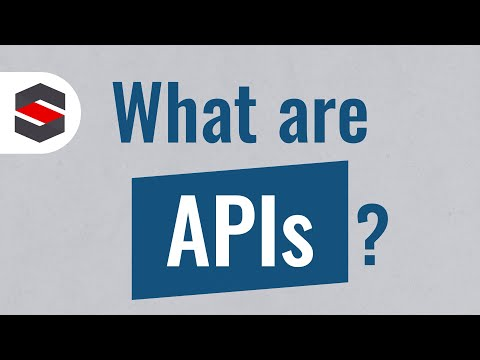

In [51]:
# https://www.youtube.com/watch?v=OVvTv9Hy91Q
from IPython.display import YouTubeVideo
YouTubeVideo("OVvTv9Hy91Q", width="600")

### Web APIs

We have already been using a bunch of APIs in this course.

Every Python module we have loaded from the [standard library](https://docs.python.org/3/library/index.html) has an API.

The [String Methods](https://docs.python.org/3/library/stdtypes.html#string-methods) we discussed in [week 5](https://github.com/pitt-sci-lis-2030/week-5-collections/blob/main/Lecture-2-strings.ipynb) provides an API for string manipulation. 

They are a *menu* of functions for performing complex operations on the strings. You call the method and let Python handle the complexity of stripping white space, replacing characters, or capitalizing the first character.

The string methods are an example of a Python programming API. There is another kind of API called [*web APIs*](https://en.wikipedia.org/wiki/Web_API) or [*web services*](https://en.wikipedia.org/wiki/Web_service) that use the World Wide Web as an interface.

## Hypertext Transfer Protocol - The Lingua Franca of the Web

![Http Slides](http-slides/Slide1.jpeg)
![Http Slides](http-slides/Slide2.jpeg)
![Http Slides](http-slides/Slide3.jpeg)
![Http Slides](http-slides/Slide4.jpeg)
![Http Slides](http-slides/Slide5.jpeg)
![Http Slides](http-slides/Slide6.jpeg)
![Http Slides](http-slides/Slide7.jpeg)
![Http Slides](http-slides/Slide8.jpeg)
![Http Slides](http-slides/Slide9.jpeg)
![Http Slides](http-slides/Slide10.jpeg)
![Http Slides](http-slides/Slide11.jpeg)
![Http Slides](http-slides/Slide12.jpeg)
![Http Slides](http-slides/Slide13.jpeg)


HTTP is the protocol or language of web browsers and web servers, but also of many other services and applications (many mobile apps use HTTP to get data).

Not just for HTML web pages, you can transfer anything via HTTP. 

This is how Web APIs work.

## Getting Data from APIs with a Web Browser

Because Web APIs use HTTP and Web Browsers speak HTTP. We can use a web browser to play around with some APIs.

But, how do you know if an API exists?

[You have search for it](https://duckduckgo.com/?q=library+of+congress+api&t=h_&ia=web)

And then, how do you use an api?

[You have to read the documentation](https://labs.loc.gov/lc-for-robots/)

### Library of Congress API

If we [look at the documentation for the LOC JSON API](https://libraryofcongress.github.io/data-exploration/) we can see there is a page specifically about making [requests](https://libraryofcongress.github.io/data-exploration/requests.html). You will often see the language of *request* and *response* from an API. That is inherited language from the HTTP protocol underneath.

According to the LOC documentation:

> All URLs start with `https://www.loc.gov/` and should include `fo=json` as a parameter to get JSON
> No API key or authentication is required.

What this means is if we add the HTTP parameter `fo=json` to any LOC page, we can get the JSON representation of that page!

Here is a item in the LOC collection about Pittsburgh: https://www.loc.gov/item/75696521/ 

Now, here is the same page, but for ROBOTS: https://www.loc.gov/item/75696521/?fo=json

Notice there is a `?fo=json`. This 

You can do this on ANY webpage:
- The front page: https://loc.gov/?fo=json
- Cats: https://www.loc.gov/item/2004670356/?fo=json
- Search Results: https://www.loc.gov/search/?in=&q=Pittsburgh&new=true&fo=json
- Trending Content: https://www.loc.gov/?fo=json&at=trending_content 

 The `?` in the URL means the beginning of an HTTP parameter (key/value pair). Each HTTP parameter is a key, and equals(`=`), and a value.

Notice there are multiple HTTP parameters in the last two examples. Each of these is separated by an ampersand (`&`). This is technically called a [*query string*](https://en.wikipedia.org/wiki/Query_string).

One way to think of Web APIs are like functions in Python. 
- The URL is the name of the function - `https://www.loc.gov/search/`
- The query string are the arguments or parameters - `?in=&q=cats&new=true&fo=json`

So if we had an **IMAGINARY** Python library, we might **imagine** the web api working like this:

```python
import loc

cat_results = loc.search(q="cat", new=True, fo="JSON") 
print(cat_results)
```
```json
...
 "results": [
    {
      "access_restricted": false,
      "aka": [
        "https://www.loc.gov/pictures/item/2004670356/",
        "http://www.loc.gov/item/2004670356/",
        "http://www.loc.gov/pictures/item/2004670356/",
        "https://www.loc.gov/pictures/collection/pga/item/2004670356/",
        "http://www.loc.gov/pictures/collection/pga/item/2004670356/",
        "http://hdl.loc.gov/loc.pnp/cph.3b24415",
        "http://hdl.loc.gov/loc.pnp/pga.07149",
        "http://www.loc.gov/resource/pga.07149/",
        "http://www.loc.gov/resource/cph.3b24415/",
        "http://lccn.loc.gov/2004670356"
      ],
      "campaigns": [],
      "contributor": [
        "hunter, thomas",
        "hunter, thomas, approximately 1828-approximately 1894"
      ],
      "date": "1874",
      "dates": [
        "1874-01-01T00:00:00Z"
      ],
      "description": [
        "1 print : tinted lithograph ; sheet 48.5 x 57.3 cm. | Print shows the faces and front paws of two sleeping cats."
      ]
...
```

***NOTE: THE ABOVE CODE IS IMAGINARY AND WILL NOT WORK BECAUSE THERE IS NO PYTHON LIBRARY LIKE THIS***

Because LOC provides a Web API, we don't need to have a Python implementaiton, we can use generic tools. This makes it easier for LOC to support many different programming lanaguges.

## HTTP in Python with Requests

Python includes an [HTTP module in the standard library](https://docs.python.org/3/library/http.html). However it is "low level" which means the API design can leave some things to be desired. 
    - Think of building a house from scratch vs. [buying one from Ikea](https://www.boklok.co.uk)
    
    
Because communicating with APIs via HTTP is so common, a software developer named [Ken Reitz](https://kenreitz.org) created a third-party Python library called [Requests](https://requests.readthedocs.io/en/master/).

"**Requests** is an elegant and simple HTTP library for Python, built for human beings."



In [ ]:
# import the requests python library so we can use it
import requests

In [ ]:
# make an HTTP GET request to http://pitt.edu
response = requests.get('http://text.npr.org')

In [ ]:
# check the status of the request
response.status_code

Whew, `200` means [successful response](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/200)

Let's look at the response headers

In [ ]:
response.headers

What a bunch of stuff! What data structure is that?

OK, now let's look at the actual response data using the `text` property of the response object. Note, text is not a function so there are no parentheses!

In [ ]:
response.text

WOWO. This is the raw HTML for http://text.npr.org. Looks like the MATRIX!

### Getting Data from APIs with Python

The previous example did a basic HTTP request for a web page. The results are intended for human consumption (well technically for consumption by a web browser, which will make the page pretty). 

We can use the same machinery to access URLs (technically *endpoints*) intended for ROBOTs.

Let's visit our favorite dataset in the whole wide world, the [Allegheny County Dog Licenses](https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/e16d4ab3-842a-4f39-9ad7-ce5921002280) at the WPRDC.

While we can download the entire dataset at once, we can also use the Data API to query the data.

The WPRDC provides a search interface for each dataset. Let's query for dogs named bud:

https://data.wprdc.org/api/3/action/datastore_search?resource_id=e16d4ab3-842a-4f39-9ad7-ce5921002280&q=bud

The output is kinda difficult to read, let's access the data with Python!

In [ ]:
# set up our request
query = "bud"
resource_id = "e16d4ab3-842a-4f39-9ad7-ce5921002280"
endpoint_url = "https://data.wprdc.org/api/3/action/datastore_search"
# buid a parameters dictioary for requests
parameters = {"resource_id": resource_id,
              "q": query}

In [ ]:
# make the request
response = requests.get(endpoint_url, params=parameters)

In [ ]:
# check the HTTP status code to see if it executed correctly 
response.status_code

In [ ]:
# Let's look at the headers out of morbid curiousity
response.headers

In [ ]:
# Now let's look at the results
response.text

What data type is this?

In [ ]:
# Let's parse or decode it from JSON to Python
response.json()

In [ ]:
# Reach into the data structure and pull out just the records list.
dogs = response.json()['result']['records']
len(dogs)

In [ ]:
# Loop over the list of records and print the names, color, and breed
for dog in dogs:
    dog_info = dog['DogName'].capitalize() + " is a " + dog['Color'].capitalize() + " " + dog['Breed'].capitalize()
    print(dog_info)

Let's say we want to search for other dog names, we could wrap our code in a function 

In [ ]:
# Create a function that takes a dog name as an parameter and returns a list of dog license records
def pgh_dog_search(query):
    # ID for the dog data
    resource_id = "e16d4ab3-842a-4f39-9ad7-ce5921002280"
    # wprdc search API
    endpoint_url = "https://data.wprdc.org/api/3/action/datastore_search"
    # create parameters for requests
    parameters = {"resource_id": resource_id,
                  "q": query}
    response = requests.get(endpoint_url, params=parameters)
    return response.json()['result']['records']


In [ ]:
# how many dogs named lilo
lilos = pgh_dog_search("Lilo")
len(lilos)

In [ ]:
lilos

### More Complex APIs - Getting the Weather


Documentation for [current weather data](https://openweathermap.org/current) from OpenWeather
```
api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
```

To use the OpenWeather api you need to [create an account](https://home.openweathermap.org/users/sign_up) and they will email you a key.

This is your special secret key for accessing the API. It needs to be kept a secret so I only won't publish they key on in the lecture notebook.

In [ ]:
api_key = "<insert API key here>"

In [ ]:
city = "Pittsburgh"
ow_endpoint = "http://api.openweathermap.org/data/2.5/weather"

parameters = {
    "q":city,
    "appid":api_key
}


In [ ]:

response = requests.get(ow_endpoint, params=parameters)
response.status_code

In [ ]:
response.json()

281 degrees YIKES!! 

In [ ]:
parameters = {
    "q":city,
    "appid":api_key,
    "units": "imperial" #MERCA
}

response = requests.get(ow_endpoint, params=parameters)
response.status_code

In [ ]:
response.json()

That is better, looks like a really nice day in Pittsburgh!

Let's make a function to check other cities.

In [ ]:
def get_temp(city):
    ow_endpoint = "http://api.openweathermap.org/data/2.5/weather"
    
    with open("api-key.txt","r") as fh:
        api_key = fh.read().strip()
    
    
    
    parameters = {
        "q":city,
        "appid":api_key,
        "units": "imperial" #MERCA
    }

    response = requests.get(ow_endpoint, params=parameters)
    return response.json()['main']['temp']

In [ ]:
get_temp("Pittsburgh")

In [ ]:
get_temp("Paris")

In [ ]:
get_temp("Los Angeles")

In [ ]:
get_temp("McMurdo Station")

### Complex LOC API Queries

Here is a [Jupyter Notebook that accesses the Library of Congress API](https://github.com/LibraryOfCongress/data-exploration/blob/master/LOC.gov%20JSON%20API.ipynb) and performs some interesting analysis


## Why use APIs?

- In some cases, like with the WPRDC, it is easier just to download all the data in "bulk"
    - This makes sense when the dataset is not too big
- When the dataset or database is very large, you have to use an API to select *subsets* of the data
    - You can't download all of LOC or Twitter
- Sometimes there are controls in place to restrict what data you are allowed to access
- APIs are not *read only* you can often perform actions with APIs
    - Post Tweets
    - Create accounts
    - Search